# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
np.random.seed(42)
indices = np.random.randint(data.shape[0], size=3)

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2932,6459,7677,2561,4573,1386
1,29703,12051,16027,13135,182,2204
2,3428,2380,2028,1341,1184,665


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
- The first sample buys very little Fresh (1st Quartile), not so much of the other food categories (Inter-Quartile) also but buys a lot of Detergents_Paper (3rd Quartile). So I would say it's some sort of retailer.
- The second sample buys a lot of all kinds of food related features (3Q) and very little of Detergents_Paper (1Q). So I would say it's a restaurant that buys cleaning supplies somewhere else.
- The third sample buys average amounts of everything (IQ), so I would say it's some sort of small restaurant or a cafe.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

for i in data.keys()[:]:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(i, axis = 1)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[i], test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(max_depth=5)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print 'Score for feature {} = {}.'.format(i, score)

Score for feature Fresh = -0.22006766862.
Score for feature Milk = 0.411045300534.
Score for feature Grocery = 0.749486883359.
Score for feature Frozen = 0.0364629601143.
Score for feature Detergents_Paper = 0.476686872027.
Score for feature Delicatessen = -0.990765315515.


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I first tried 'Fresh', just because it was the first. But looking at a very bad fit to the data (negative R2) I decided to look at some other features.
- It looks like 4 of them (all but Fresh and Delicatessen) have ok results, any of them could be chosen to be left out of data analysis.  But it seems that 'Grocery' is the one that stands out. So I would chose 'Grocery' to be left out in case I have to choise one. In this case, the information contained in the 6th feature is highly correlated with the 5 others, so the other 5 features alone are able to capture customer's spending habits.

- Finally, 'Fresh' and 'Delicatessen' are not at all explained by the rest of the data (negative R2) and the information contained in it should certainly be used to identify customer's habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

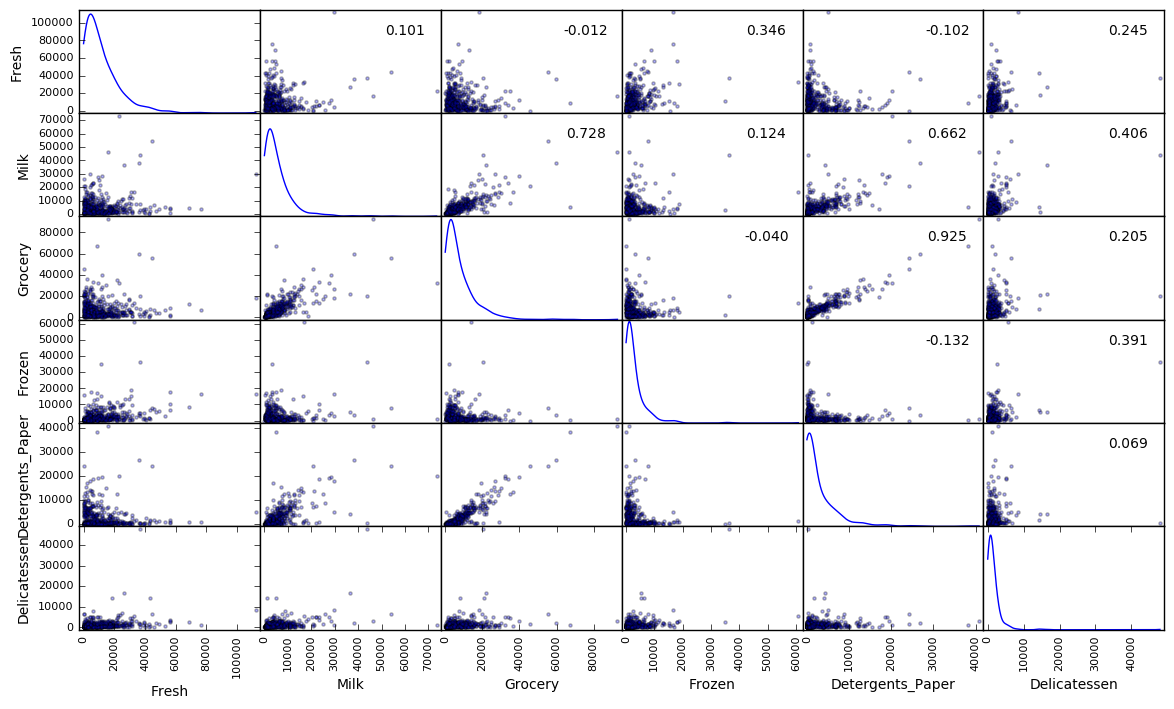

In [5]:
# Produce a scatter matrix for each pair of features in the data
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
- It seems that Grocery-Detergents_Paper and Milk-Grocery have high correlation. This would explain what we previously saw, 'Grocery' indeed appears to be highly correlated with other features, therefore it could be the one left out of the analysis.
- Also, these are only 2D correlations, it could also be that these 2 features are more correlated with linear combinations of the remaining features, so it wouldn't show it in these plots.
- Regarding 'Fresh' and 'Delicatessen', we saw that it's hard to predict their behavior using the other 5 features, and indeed we don't see any obvious correlation here. So it also confirms our suspicions about them not being correlated with the rest of the data set.
- The data is certainly not normal in any of the features, all distributions are skewed with the data being heavily concentrated in lower values. The distributions seem to fall faster than 1/x, but without fitting for some hipothesis it's impossible to tell if it's an exponential decay or some (1/x)^n.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

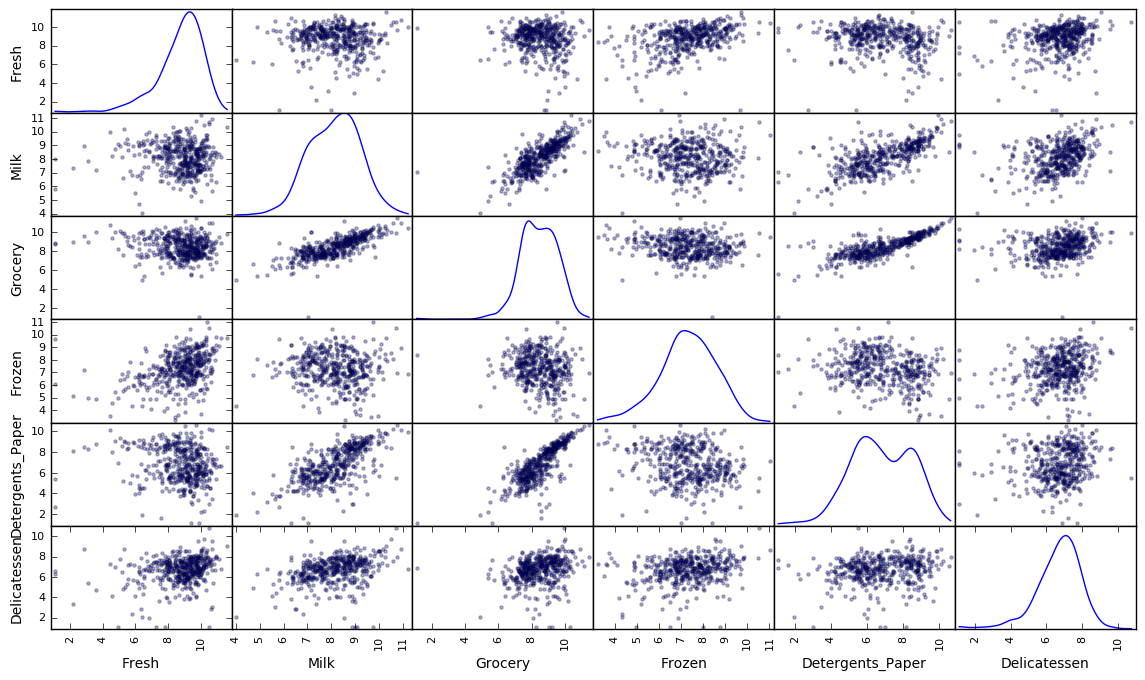

In [6]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [7]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7.983440,8.773230,8.945984,7.848153,8.427925,7.234177
1,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
2,8.139732,7.774856,7.614805,7.201171,7.076654,6.499787


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [8]:
outliers  = []
outliers2 = []
outliersE = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)

    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # OPTIONAL: Select the indices for data points you wish to remove
    for i in log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index:
        if i in outliers:
            outliers2.append(i)
        else:
            outliers.append(i)
    for i in log_data[~((log_data[feature] >= Q1 - 2*step) & (log_data[feature] <= Q3 + 2*step))].index:
        outliersE.append(i)

outliers2 = list(np.unique(outliers2))
outliersE = list(np.unique(outliersE))
print outliers
print outliers2
print outliersE

outliers = np.unique(outliers2 + outliersE)
print outliers
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 38, 57, 145, 175, 264, 325, 420, 429, 439, 161, 109, 137, 142, 183, 184, 187, 203, 233, 285, 289, 343]
[65, 66, 75, 128, 154]
[66, 75, 95, 109, 128, 142, 187, 218, 338]
[ 65  66  75  95 109 128 142 154 187 218 338]


Simple check of good_data and the outliers:

In [9]:
good_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,8.817825,8.124814,8.448697,7.319444,6.813763,6.729866
std,1.296488,1.059489,1.046964,1.260485,1.670045,1.175367
min,3.135494,4.718499,5.384495,3.218876,1.098612,1.945910
25%,8.117312,7.354362,7.671827,6.651572,5.575949,6.035481
50%,9.060331,8.194229,8.463792,7.340187,6.700731,6.892642
75%,9.737197,8.867427,9.272940,8.174421,8.284252,7.510431
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


In [10]:
log_data.iloc[outliers]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Yes, based on the above definition, 5 data points are considered outliers in more than 1 feature. I classified outliers into 3 categories:
- The ones following Turkey's definition of 1.5\*IQR, but are not as extreme as 3*IQR and appear as outlier only in one feature but not the others are considered OK. Therefore these are not removed from the data sample. One reason is to avoid overfitting of the data since as we saw some features are highly correlated.
- The ones that appear as outliers in more than 1 featured are removed.
- The ones lying outside the 3*IQR range are considered too 'extreme' even if only in one feature and are also removed from the data to make it smoother.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

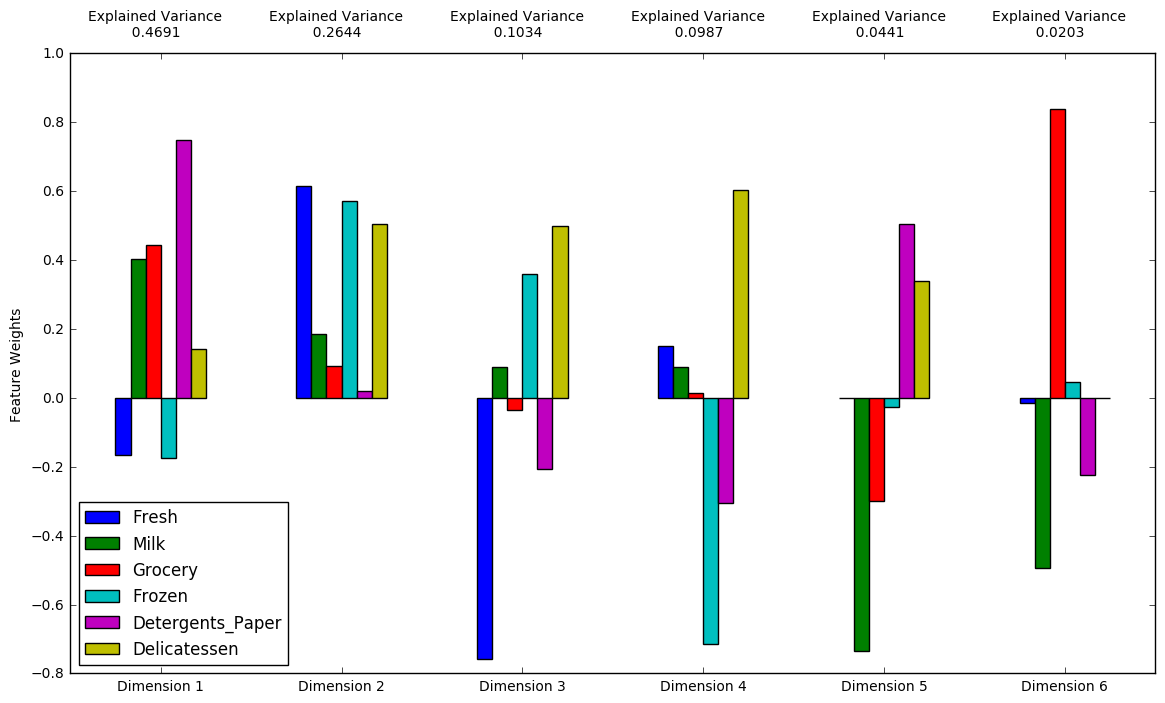

In [11]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=good_data.shape[1])
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

In [12]:
print np.cumsum(pca.explained_variance_ratio_)

[ 0.46909093  0.73353513  0.83692118  0.9355749   0.97967405  1.        ]


**Answer:**

The first 2 principal components alone explain ~73.3% of the variance in the data, while the first 4 components explain ~93.6%.

- In the first dimension we can see positive correlations among Detengents_Paper, Milk, Grocery and in smaller strength with Delicatessen. These are negatively correlated with Fresh and Frozen. I believe this group can represent a retailer where they offer coffee and snacks to their customers or some sort of coffee shop but certainly not a restaurant given the anti-correlation between Grocery and Fresh/Frozen.
- In the second dimension we see that everything is positively correlated with the strongest correlations being among Fresh, Frozen and Delicatessen. And very weakly correlated is Detergents_Paper. This group may represent my second sample where we guessed it can be restaurants or even hotels that buy their food supply from this shop but cleaning supplies from another.
- In the third dimension Fresh is correlated with Detergents_Paper and Grocery (weakly) but anticorrelated with the rest, so Milk, Frozen and Delicatessen. This makes it hard for me to guess what kind of customer can this Dimension represent. But maybe some sort of Delicatessen where they also sell ice cream and coffee and as group 2 they get their cleaning supplies somewhere else.
- In the fourth dimension Frozen and Detergents_Paper are negatively correlated with the rest. With Frozen being the prevalent feature of the dimension. So the more Frozen and Detergents_Paper categories are bought, less of the other 4 features are bought. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [13]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.8082,0.2404,0.7816,-0.6270,0.3462,-0.2282
1,-0.6308,2.9533,0.5393,-0.1220,-1.8461,0.8422
2,-0.2151,-0.7380,0.2992,-0.2784,0.5648,-0.5804


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [14]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [15]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.8082,0.2404
1,-0.6308,2.9533
2,-0.2151,-0.7380


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

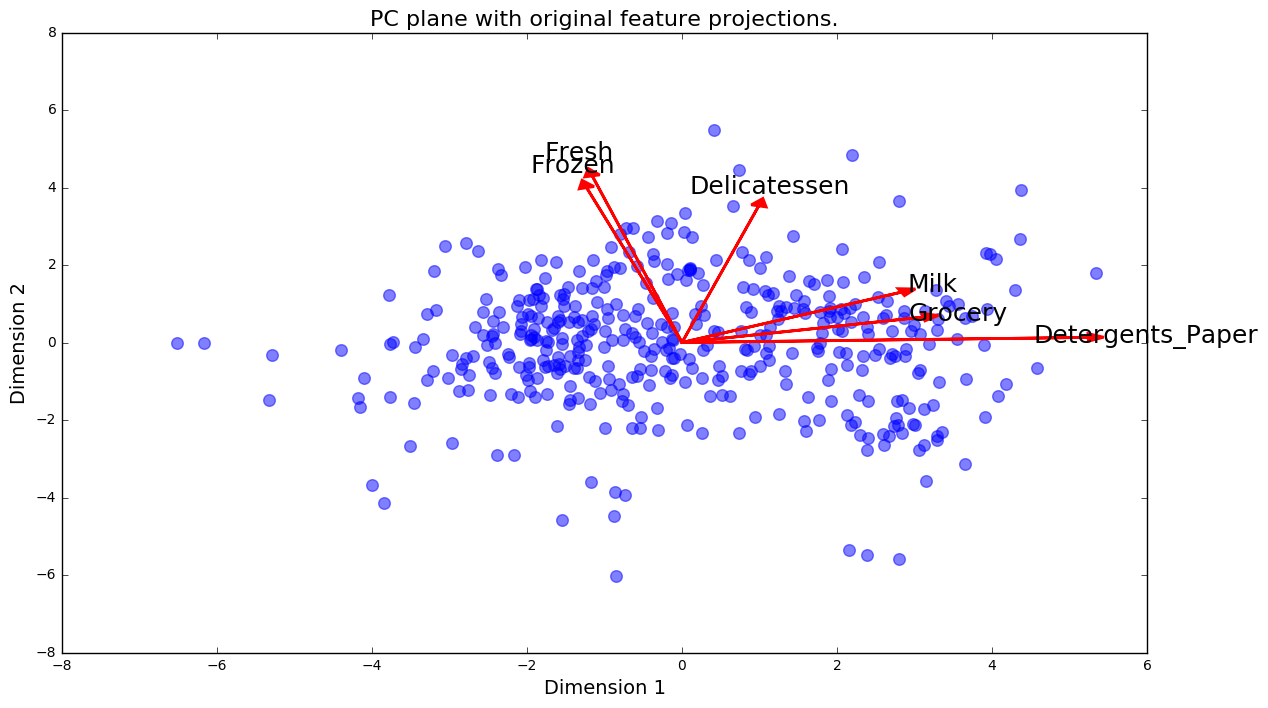

In [16]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

K-means is very fast and makes no assumptions on the underlying distributions of the data. GMM is also very fast compared to other Mixing models and it produces unbiased results for the mean and cluster sizes. Another advantage of GMM is soft-assignment compared to hard-assignment used in K-means.
What this means is that, in K-means a data point has to belong to a single cluster at all iterations. From one iteration to the next it can change clusters, but it has to belong to one and only one cluster at all times.
While in soft-assignment a point has a probablity of belonging to each cluster.


Given the distributions we saw previously, I believe K-means will work better. As we saw, the features were highly asymmetrical, so definitely non-Gaussian features. We certainly did a lot of work to preprocess this data with feature scalling and outliers removal. Then preprocessed data presents more Gaussian-like features than the initial data. But I believe there are still some features that might produce worse results for GMM. Like Detergents_Paper for example, whose distribution is sort of a double-Gaussian pattern.

Therefore, I will choose to work with K-Means!

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sil
    
def best_n(n):
    scores = []
    nclusters = range(2, n+1)
    for ncluster in nclusters:
        clusterer, preds, centers, sample_preds, score = kcluster(ncluster)
        scores.append(score)

    print 'For n = 2 to n = {} the scores are:\n{}'.format(n, scores)
    n_best = nclusters[scores.index(max(scores))]
    print '\nThe best score is {} for n = {}.'.format(round(max(scores),2), n_best)
    return n_best

def kcluster(n=2):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n, random_state=42)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = (sil(reduced_data, preds))
    return clusterer, preds, centers, sample_preds, score

In [18]:
use_n = best_n(5)
clusterer, preds, centers, sample_preds, score = kcluster(use_n)

For n = 2 to n = 5 the scores are:
[0.43071369826551154, 0.34064155228308535, 0.33236785912286937, 0.35282968733106068]

The best score is 0.43 for n = 2.


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

I tried 4 cluster numbers, from 2 to 5. The silhouette scores can be seen in the output cell above. We can see that out of those, n_cluster = 2 has the best score.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

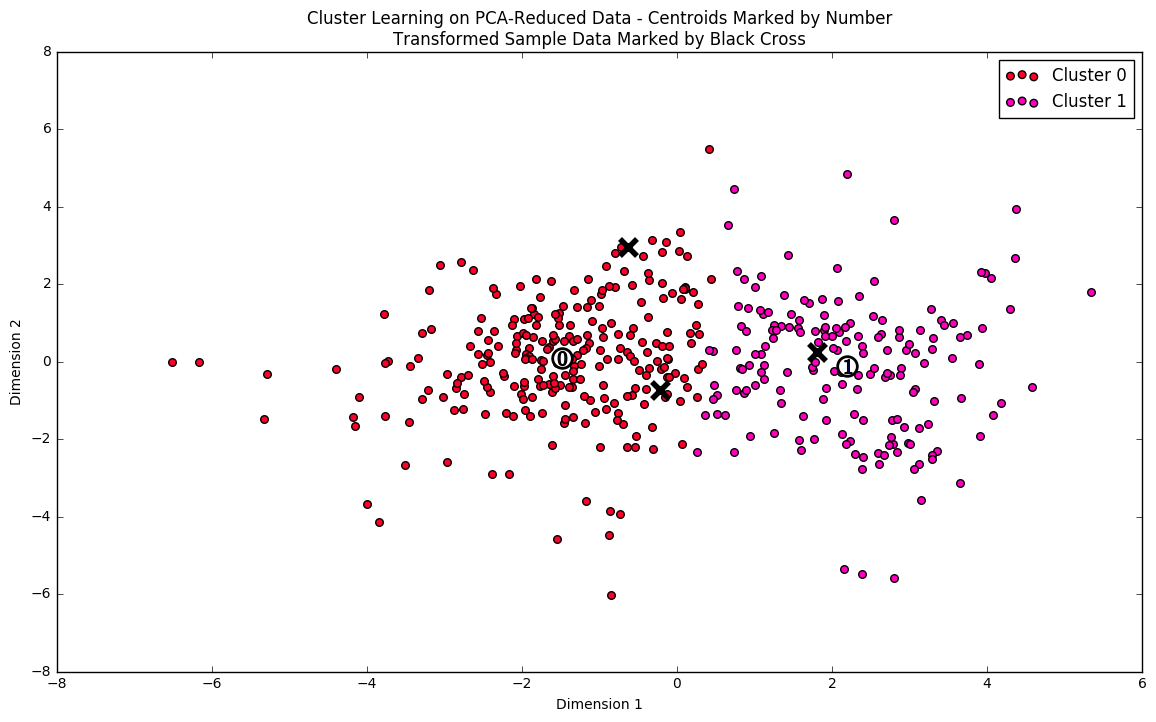

In [19]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [20]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(centers.shape[0])]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9096.0,1887.0,2438.0,2056.0,301.0,709.0
Segment 1,4347.0,7990.0,12214.0,955.0,4676.0,1070.0


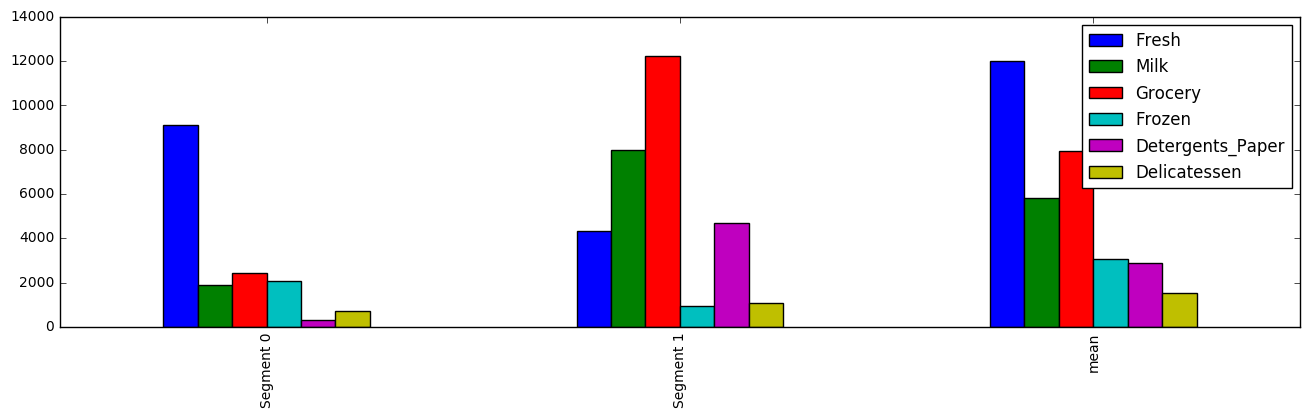

In [21]:
true_centers = true_centers.append(data.describe().ix['mean'])
true_centers.plot(kind = 'bar', figsize = (16, 4))

In [22]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
- Segment 0 buys average amounts (inter-quartile) of all the products. This segment can represent restaurants or cafes.
- Segment 1 buys average amounts of Fresh, Frozen and Delicatessen, and also it buys more than average (3Q) amounts of Milk, Grocery and Detergents_Paper. This one can represent retail stores. 

In [23]:
def inverse_pred(pred):
    inverse = [1 if i == 0 else 0 for i in pred]
    return inverse
inverse_pred(sample_preds)

[0, 1, 1]

In [24]:
dist = [0,0,0]
dist2 = [0,0,0]
for i, (pred, pred2) in enumerate(zip(sample_preds, inverse_pred(sample_preds) )):
    for j, k in enumerate(samples.iloc[i]):
        dist[i] += (samples.iloc[i][j] - true_centers.iloc[pred][j])**2
        dist2[i] += (samples.iloc[i][j] - true_centers.iloc[pred2][j])**2
for k, (i, j) in enumerate(zip(dist, dist2)):
    print 'Sample {}'.format(k)
    print 'Distance to Predicted Cluster = {}'.format(np.sqrt(i))
    print 'Distance to Rejected Cluster = {}'.format(np.sqrt(j))   
    print

Sample 0
Distance to Predicted Cluster = 5255.49769289
Distance to Rejected Cluster = 10261.994884

Sample 1
Distance to Predicted Cluster = 28941.4874013
Distance to Rejected Cluster = 29048.0949117

Sample 2
Distance to Predicted Cluster = 5816.37541773
Distance to Rejected Cluster = 12189.2715943



### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [25]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


In [27]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2932,6459,7677,2561,4573,1386
1,29703,12051,16027,13135,182,2204
2,3428,2380,2028,1341,1184,665


In [28]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Answer:**

Yes, we actually made good guesses back in our predictions for the sample points. 
Sample 1 was predicted to be some sort of retailer, which matches the prediction of Cluster 1.
While samples 2 and 3 were said to be restaurant and cafe respectively which is what we see for Cluster 0.

- Sample 1 buys average amounts of all the features with an excess in Detergents_Paper, which is one of the features seen in Segment 1. Calculating the distance of sample 1 to Segment 1 we see that it is indeed much closer than Segment 0.
- Sample 2 is a bit tricky, because it buys big amounts of all features but Detergents_Paper, which it buys very little. If we look at the distance of sample 2 to the predicted cluster and the rejected cluster (as calculated in a few cells above) we can see that it's a close call, but indeed it gets chosen as the same cluster as we predicted.
- Sample 3 is easier since it buys average amounts of everything, it matches well with what we saw for Segment 0.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

A/B tests can certainly be used in this situation. It is more general than a 2-hypotheses test, but in our present case we have the simplest situation: we have 2 classes of customers in our data set and we have 2 hypotheses for a service, the current (A) and a newly proposed (B) delivery system.

What the A/B test can do for us is determine which system A or B is better for each group. We don't have a reason to expect that all customers in our data set will react equally to the new system, either positively or negatively. By performing an A/B test we can see how each group will react to the change separately.

This way the wholesale can make a decision regarding making the change or not for each group separately. For example, even if keeping the current system (A) is overall better, it can be that the new system (B) is better for segment 0. That way the wholesale can choose to keep the A for segment 1 and change it to B for segment 0.

Clearly, this raises logistics issues that go beyond the scope of this discussion. It may be worse for the wholesale to have both systems working, so either everybody gets a 5-day delivery or a 3-day one. 
But as far as A/B tests go, we can at least in a simplified way have an idea of which system is ideal for each group.

So, knowing the customer segments can be very useful to distinguish the classes of customers and separate them during A/B testing.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

Now that the N-clusters have been defined in the customer data, we know the regions each cluster spans in the K-dimensional space of features. In our case we have 2 clusters in a 6-dimensional space, so our data set learned what is the region that define cluster 0 and what defines cluster 1. 

We saw these regions in a simplified 2D projection using PCA, but in reality we have divisions in our 6D space. It is easy to visualize in 2D, but all ideas apply to any dimension.

Therefore, since we have the predictions for annual spending, we only have to look at which region in this 6D space the new customer lies and determine which cluster it corresponds to.
Equivalently, one can calculate the distance(\*) of the new customer point to all cluster centers and see which one is minimal. That cluster center that minimizes the distance to the new customer point is the cluster the new customer belongs to.


Another approach would be to use the labels predicted by clustering in a supervised learning algorithm. We can train the algorithm using the old customers data and their predicted clusters as labels (target variable).
Once new customers arrive, we simply predict their label using the supervised learning algorithm we trained.

(\*) Using the same metric used to train the clustering algorithm.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

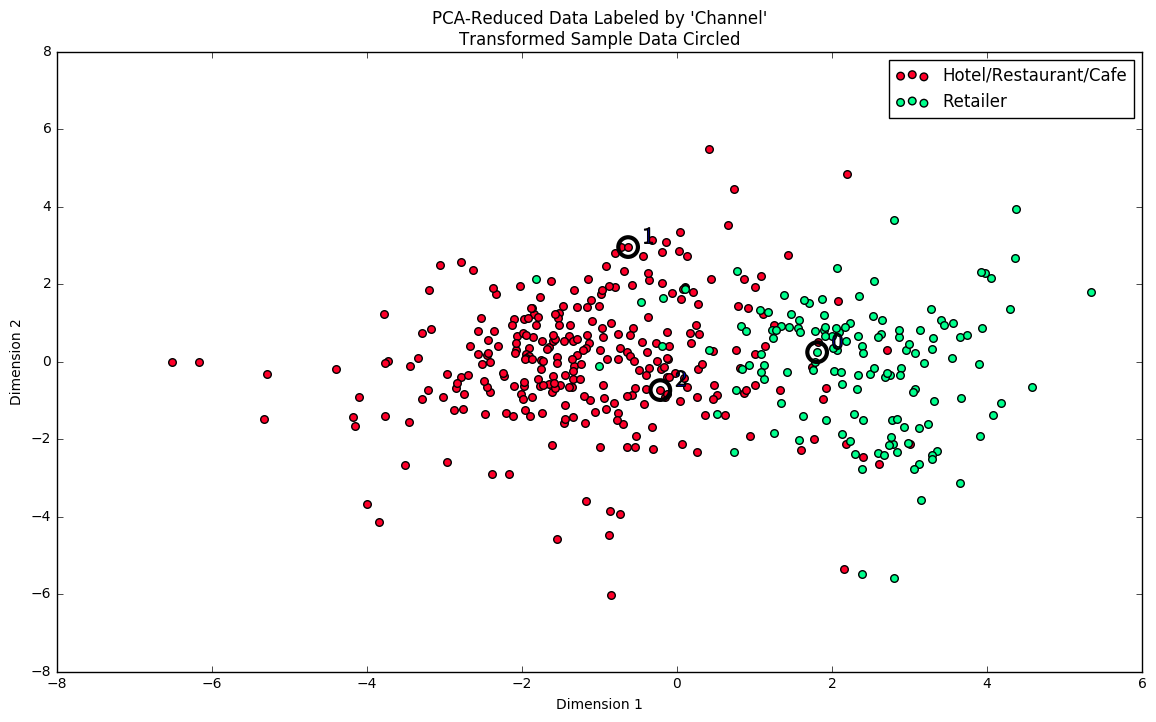

In [29]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer**

I'd say both distributions (Channel and Predicted by K-means) are very similar. Both have a 2-cluster division and these 2 clusters have very similar structures.

It looks like the HoReCa cluster is more pure than the Retailer cluster. We can see a few Retailer outliers in the Red cluster, but we can see a few more red outliers invading the Retailer cluster space.
This of course does not happen in our K-means clusters.

But even with small discrepancies I'd say there's a direct correspondance between HoReCa - Segment 0 and Retailers - Segment 1. This also supports our previous discussion of what the segments might represent and our sample points.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.